In [2]:
#Annoying folder stuff
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
# Import plotting and numpy
import math as m
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

# Import vortex panel and boundary layer functions
from vortexpanel import VortexPanel as vp
from vortexpanel import BoundaryLayer as bl

In [3]:
#https://en.wikipedia.org/wiki/NACA_airfoil#Equation_for_a_cambered_4-digit_NACA_airfoil
def camber_line( x, m, p, c ):
    return np.where((x>=0)&(x<=(c*p)),
                    m * (x / np.power(p,2)) * (2.0 * p - (x / c)),
                    m * ((c - x) / np.power(1-p,2)) * (1.0 + (x / c) - 2.0 * p ))

def dyc_over_dx( x, m, p, c ):
    return np.where((x>=0)&(x<=(c*p)),
                    ((2.0 * m) / np.power(p,2)) * (p - x / c),
                    ((2.0 * m ) / np.power(1-p,2)) * (p - x / c ))

def thickness( x, t, c ):
    term1 =  0.2969 * (np.sqrt(x/c))
    term2 = -0.1260 * (x/c)
    term3 = -0.3516 * np.power(x/c,2)
    term4 =  0.2843 * np.power(x/c,3)
    term5 = -0.1015 * np.power(x/c,4)
    return 5 * t * c * (term1 + term2 + term3 + term4 + term5)

def naca4(x = np.linspace(0,1,200), m=0.05, p=0.3, t=0.13, c=1): # vary accuracy using x value
    dyc_dx = dyc_over_dx(x, m, p, c)
    th = np.arctan(dyc_dx)
    yt = thickness(x, t, c)
    yc = camber_line(x, m, p, c)  
    x_top, y_top = (x - yt*np.sin(th), yc + yt*np.cos(th))
    x_bot, y_bot = (x + yt*np.sin(th), yc - yt*np.cos(th))
    xbot = np.flip(x_bot)
    ybot = np.flip(y_bot)
    x = np.concatenate([xbot[:-1], x_top])
    y = np.concatenate([ybot[:-1], y_top])
    return x, y


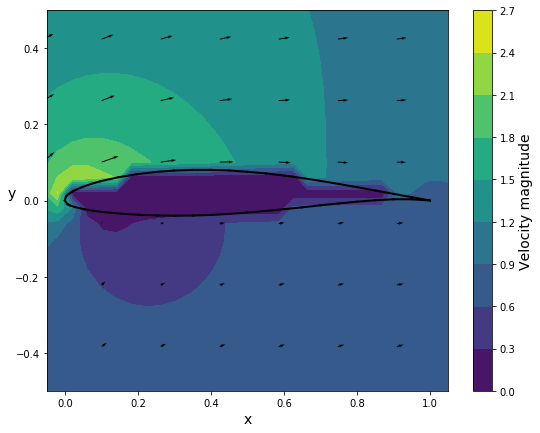

In [15]:
#solve done to test function
panels = vp.panelize(xlist, ylist)

alpha = np.pi/8
panels.solve_gamma(alpha, kutta = [(0,-1)])
panels.plot_flow()

plt.xlim(-0.05, 1.05); plt.ylim(-0.5, 0.5);

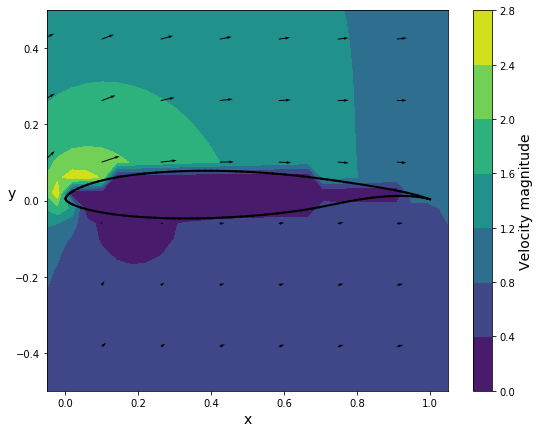

In [13]:
f = open('H106.txt', 'r')
xlist = []
ylist = []
array1 = []
series = f.readlines()

for line in series:
    array1 = line.split()
    xlen = len(array1)
    test = array1[0]
    test2 = array1[1]
    xpoint = float(test)
    ypoint = float(test2)
    xlist.append(xpoint)
    ylist.append(ypoint)
 
xlist.reverse()
ylist.reverse()

#solve done to test function
panels = vp.panelize(xlist, ylist)

alpha = np.pi/8
panels.solve_gamma(alpha, kutta = [(0,-1)])
panels.plot_flow()

plt.xlim(-0.05, 1.05); plt.ylim(-0.5, 0.5);

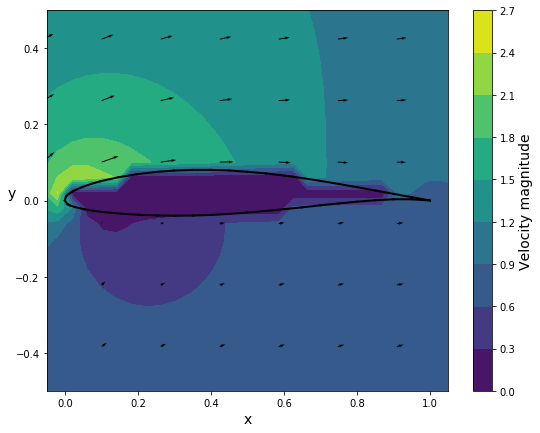

In [14]:
f = open('63412.txt', 'r')
xlist = []
ylist = []
array1 = []
series = f.readlines()

for line in series:
    array1 = line.split()
    xlen = len(array1)
    test = array1[0]
    test2 = array1[1]
    xpoint = float(test)
    ypoint = float(test2)
    xlist.append(xpoint)
    ylist.append(ypoint)
    
xlist.reverse()
ylist.reverse()

#solve done to test function
panels = vp.panelize(xlist, ylist)

alpha = np.pi/8
panels.solve_gamma(alpha, kutta = [(0,-1)])
panels.plot_flow()

plt.xlim(-0.05, 1.05); plt.ylim(-0.5, 0.5);